In [29]:
#Importing required packages
import numpy as np
import matplotlib.pyplot as plt
from springrank import SpringRank
import polars as pl
import networkx as nx
from src import rank_swirl #this will only work if your ipynb file lives outside of the code folder
import io 
from PIL import Image
import cairosvg 

In [ ]:
#read in df
df = pl.read_csv("data/aggXquarter.txt", separator = "\t")

#filter dfs by group + quarter
df_q1_g1 = df.filter(pl.col("study.quarter") == 1).filter(pl.col("group") == "G1")
df_q1_g2 = df.filter(pl.col("study.quarter") == 1).filter(pl.col("group") == "G2")
df_q2_g1 = df.filter(pl.col("study.quarter") == 2).filter(pl.col("group") == "G1")
df_q2_g2 = df.filter(pl.col("study.quarter") == 2).filter(pl.col("group") == "G2")
df_q3_g1 = df.filter(pl.col("study.quarter") == 3).filter(pl.col("group") == "G1")
df_q3_g2 = df.filter(pl.col("study.quarter") == 3).filter(pl.col("group") == "G2")
df_q4_g1 = df.filter(pl.col("study.quarter") == 4).filter(pl.col("group") == "G1")
df_q4_g2 = df.filter(pl.col("study.quarter") == 4).filter(pl.col("group") == "G2")

#create list / dictionary to filter by group + quarter (tuple) (this doesn't work yet)
group_1_df_dict = {"Q1G1": df_q1_g1, "Q2G1": df_q2_g1, "Q3G1":df_q3_g1, "Q4G1":df_q4_g1, "Q1G2": df_q1_g2, "Q2G2": df_q2_g2, "Q3G2":df_q3_g2,"Q4G2":df_q4_g2}

In [ ]:
#build dictionaries of graphs, adjacency matrices, and spring ranks (the original way)

G_dict = {}
A_dict = {}
S_dict = {}
print(node_dict)
for name in df_dict: 
    G = nx.DiGraph()
    G.add_weighted_edges_from(df_dict[name]["actor", "target","number.wins"].rows())
    node_dict = {i: n for i, n in enumerate(G.nodes)}
    A = nx.to_numpy_array(G)
    A_dict[name] = A
    A_dict = 
    G_dict[name] = G
    model = SpringRank(alpha = 0.1)
    model.fit(A)
    S = model.ranks
    #np.argsort(S)[::-1], S #create ordinal ranking
    S_dict[name] = S
    
    #this is a way to make S_dict into a dictionary of dictionaries but only by # not node id
S_dict = {key: {i: val for i, val in enumerate(arr)}
        for key, arr in S_dict.items()}

In [ ]:
#build dictionaries of graphs, adjacency matrices, and spring ranks, trying to make sure the nodes stay in the same spot

G_dict = {}
A_dict = {}
S_dict = {}
rank_dict = {}
for name in df_dict: 
    G = nx.DiGraph()
    G.add_weighted_edges_from(df_dict[name]["actor", "target","number.wins"].rows())
    nodes = list(G.nodes())
    node_dict = {i: n for i, n in enumerate(G.nodes)}
    A = nx.to_numpy_array(G, nodelist = nodes)
    A_dict[name] = A
    G_dict[name] = G
    model = SpringRank(alpha = 0.1)
    model.fit(A)
    S = model.ranks
    # np.argsort(S)[::-1], S #create ordinal ranking
    S_dict[name] = S
    rank_dict[name] = {node_dict[i]: S[i] for i in range(len(S))}



{0: 'bnn', 1: 'gnr', 2: 'nbb', 3: 'ngn', 4: 'nnb', 5: 'nnr', 6: 'nrg', 7: 'bnr', 8: 'gnb', 9: 'nbn', 10: 'ngb', 11: 'ngg', 12: 'ngr', 13: 'nrn', 14: 'nrr', 15: 'rnr', 16: 'gnn', 17: 'nbr', 18: 'nng'}


In [45]:
#calculate rank ranges
ranges = {}
for S in S_dict: 
    #print(S_dict[S])
    high_rank = np.max(S_dict[S])
    low_rank = np.min(S_dict[S])
    range = high_rank - low_rank
    ranges[S] = range
print(ranges)


{'Q1G1': np.float64(2.193334876498093), 'Q2G1': np.float64(2.795614170640981), 'Q3G1': np.float64(2.619094275183537), 'Q4G1': np.float64(2.89843558823034), 'Q1G2': np.float64(2.232083873284499), 'Q2G2': np.float64(1.9428341538293323), 'Q3G2': np.float64(2.079145594182396), 'Q4G2': np.float64(1.9184755802186877)}


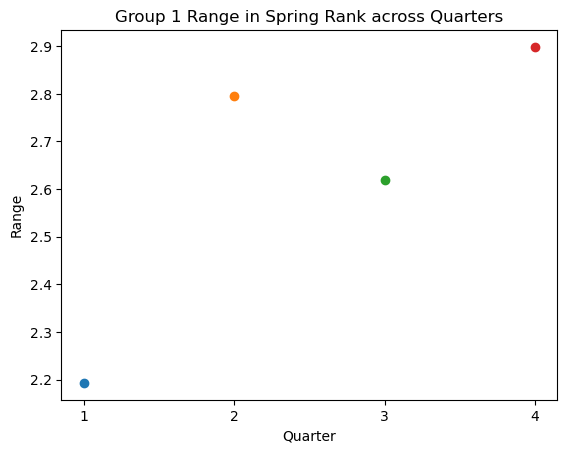

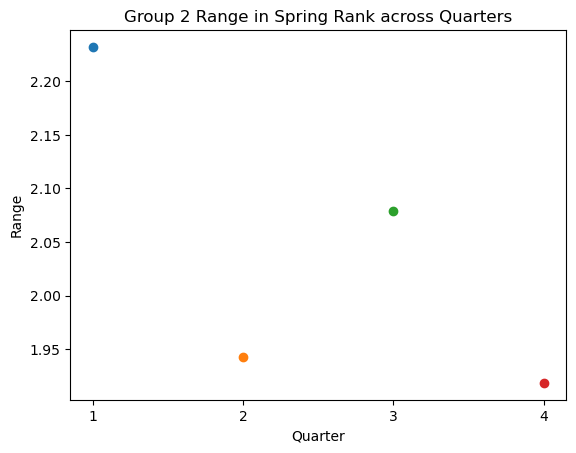

In [ ]:
#plot ranges of Spring Rank over time
quarter_names = sorted(S_dict.keys())
group_1 = [name for name in quarter_names if name.endswith("G1")]
group_2 = [name for name in quarter_names if name.endswith("G2")]
#plot rank ranges 
k = 1
for name in group_1: 
    plt.scatter(k,ranges[name])
    k = k + 1
    plt.title("Group 1 Range in Spring Rank across Quarters")
    plt.xticks([1,2,3,4])
    plt.xlabel("Quarter")
    plt.ylabel("Range")
    
plt.show()
k = 1
for name in group_2:
    plt.scatter(k, ranges[name])
    k = k + 1
    plt.title("Group 2 Range in Spring Rank across Quarters")
    plt.xticks([1,2,3,4])
    plt.xlabel("Quarter")
    plt.ylabel("Range")
plt.show()


In [ ]:
#don't need to do this anymore - made S_dict a dictionary of dictionaries
for key, arr in S_dict.items():
    print(key)
    print(arr)
S_dict = {key: {i: val for i, val in enumerate(arr)}
    for key, arr in S_dict.items()}
print(S_dict)

{0: 'bnn', 1: 'gnr', 2: 'nbb', 3: 'ngn', 4: 'nnb', 5: 'nnr', 6: 'nrg', 7: 'bnr', 8: 'gnb', 9: 'nbn', 10: 'ngb', 11: 'ngg', 12: 'ngr', 13: 'nrn', 14: 'nrr', 15: 'rnr', 16: 'gnn', 17: 'nbr', 18: 'nng'}
Q1G1
[-0.55676738 -0.97051311  0.88859717  0.10378425  0.21397034 -0.51050766
 -0.00707677  0.16190232 -0.23613259  0.50620919 -0.27163577 -0.29800466
 -0.52307821  1.14312005  0.65532206 -0.53583996  0.37520789  0.35592672
 -1.05021482 -0.49823803  1.05396895]
Q2G1
[-0.35484125 -0.41629378 -0.22585126 -0.9856366  -0.54657033 -0.30042798
  0.07529799 -0.84980579 -0.86905699 -0.12816049  0.68239479  0.03190862
  0.33391638  0.33870234  0.35046362 -0.38640225  1.27168326  0.73902269
 -1.12386608  0.69177502  1.67174809]
Q3G1
[-0.50752518 -0.56004505 -0.66061611 -0.72281059 -0.46434661  0.45232643
  0.21713964 -0.11200229 -0.16142934 -1.18873118  0.41984449  0.102747
 -0.83938322 -0.6014639   0.26449849 -0.24472674  1.29158334  0.57481476
  0.52059283  0.78917015  1.43036309]
Q4G1
[-0.1816556

In [ ]:
del range #make sure your range is right if the below is not working, bc you call something else range

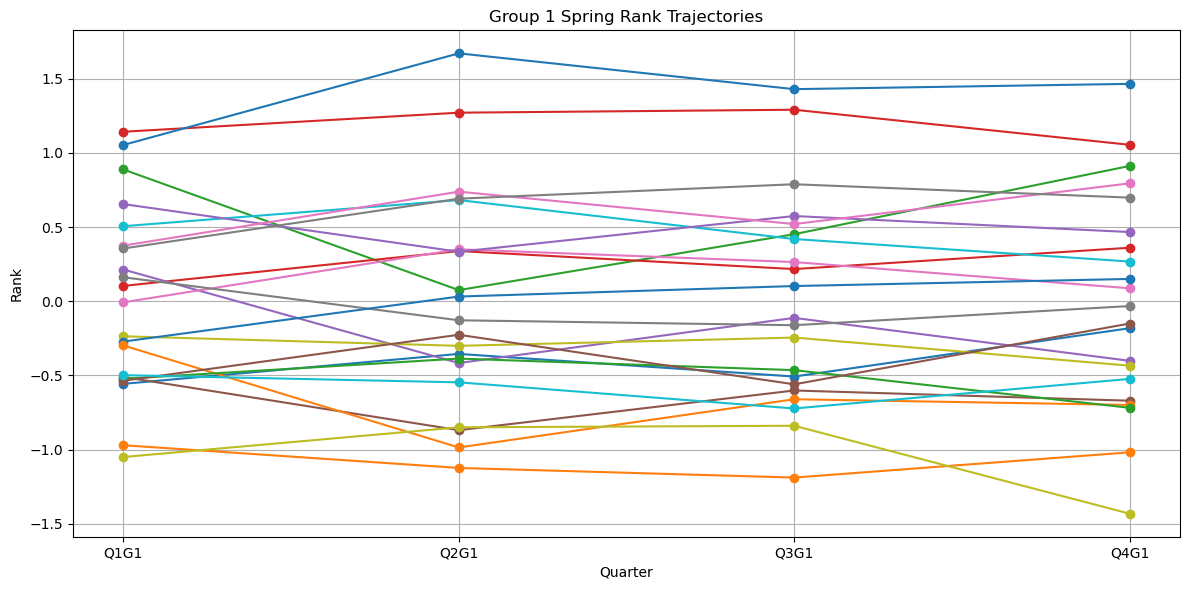

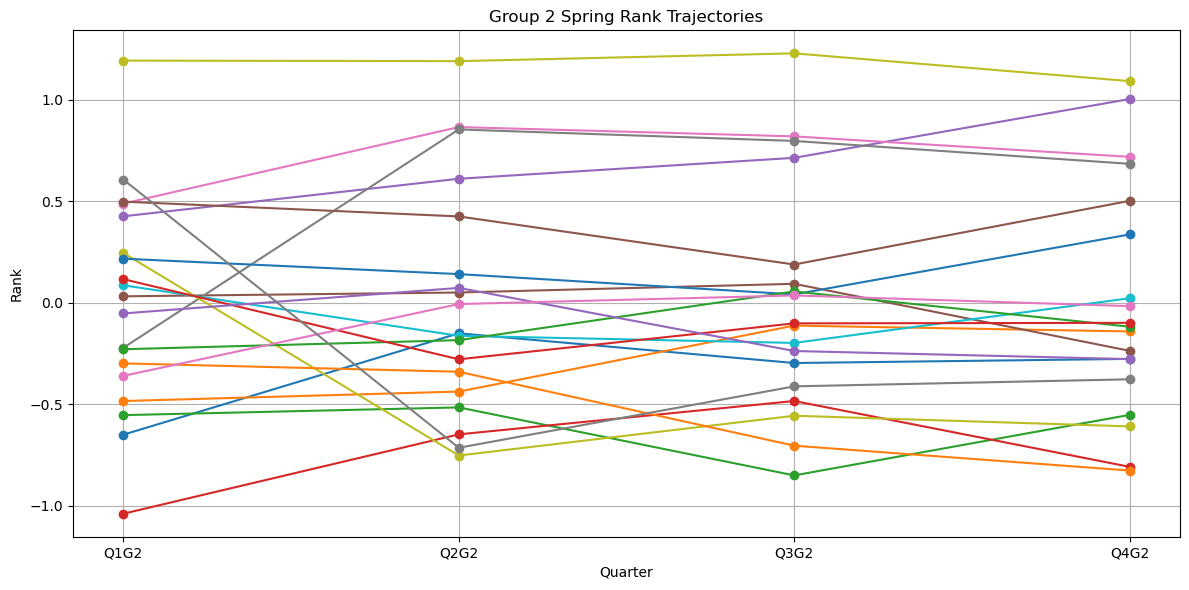

In [ ]:
#plot spring rank trajectories (should make a function for this)
keys = sorted(rank_dict.keys())
group_1_keys = [name for name in keys if name.endswith("G1")]
group_2_keys = [name for name in keys if name.endswith("G2")]
group_1_values = [rank_dict[k] for k in group_1_keys]
group_2_values = [rank_dict[k] for k in group_2_keys]
group_1_nodes = list(group_1_values[0].keys())
group_2_nodes = list(group_2_values[0].keys())
plt.figure(figsize=(12,6))
for node in group_1_nodes:
    y = [rank_dict[k][node] for k in group_1_keys] 
    plt.plot(group_1_keys, y, marker = 'o', label = f"Index {node}")
plt.xlabel("Quarter")
plt.ylabel("Rank")
plt.title("Group 1 Spring Rank Trajectories")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
for node in group_2_nodes:
    y = [rank_dict[k][node] for k in group_2_keys] 
    plt.plot(group_2_keys, y, marker = 'o', label = f"Index {node}")
plt.xlabel("Quarter")
plt.ylabel("Rank")
plt.title("Group 2 Spring Rank Trajectories")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
#idk what this was but I'm scared to delete
nodes  =  sorted(set(group_df['actor']).union(group_df['target']))
nodes_by_group[g]  =  nodes

In [ ]:
#trying to make Rahul's code work for Spring Rank trajectories (it doesn't)
tmp = node_dict[df_dict.keys() == name]
for node in node_dict: #or this could be the unique counts of the df?
    plt.plot(sub['quarter'], sub['rank'], marker = 'o', alpha = 0.6)
    plt.gca().invert_yaxis()
    plt.xticks([1,2,3,4])
    plt.xlabel("Quarter")
    plt.ylabel("Spring Ranking")
    plt.title(f"Spring Rank Trajectories; Group {group}")
    plt.grid(True, alpha = 0.3)
    plt.show()


In [ ]:
#this is Rahul's code for the rank trajectories diagram
tmp = df_mvr[df_mvr['group'] == group]
plt.figure(figsize = (10,6))
for bird in tmp['individual'].unique():
        sub  =  tmp[tmp['individual'] == bird].sort_values('quarter')
        plt.plot(sub['quarter'], sub['rank'], marker = 'o', alpha = 0.6)
    
    plt.gca().invert_yaxis()   # rank 0 at top
    plt.xticks([1,2,3,4])
    plt.yticks([1,4,8,12,16,20]) #I added bc the y axis should be integer ranks
    plt.xlabel("Quarter")
    plt.ylabel("Rank (lower  =  dominant)")
    plt.title(f"Rank Trajectories; Group {group}")
    plt.grid(True, alpha = 0.3)
    plt.show()

plot_rank_trajectories(1)
plot_rank_trajectories(2)

In [ ]:
#extra
print(G_dict)
#index dictionary by list of order to plot things, nodes need ids, list of labels (q1, q2) to for loop over to plot - need a node dictionary
print(S_dict["Q1G1"])

{'Q1G1': <networkx.classes.digraph.DiGraph object at 0x0000024A2B7B3D60>, 'Q2G1': <networkx.classes.digraph.DiGraph object at 0x0000024A2C374EE0>, 'Q3G1': <networkx.classes.digraph.DiGraph object at 0x0000024A2BC3D360>, 'Q4G1': <networkx.classes.digraph.DiGraph object at 0x0000024A2CF72A10>, 'Q1G2': <networkx.classes.digraph.DiGraph object at 0x0000024A2CF72D10>, 'Q2G2': <networkx.classes.digraph.DiGraph object at 0x0000024A2BAB2110>, 'Q3G2': <networkx.classes.digraph.DiGraph object at 0x0000024A2C376BF0>, 'Q4G2': <networkx.classes.digraph.DiGraph object at 0x0000024A2C377C10>}
[-0.55676738 -0.97051311  0.88859717  0.10378425  0.21397034 -0.51050766
 -0.00707677  0.16190232 -0.23613259  0.50620919 -0.27163577 -0.29800466
 -0.52307821  1.14312005  0.65532206 -0.53583996  0.37520789  0.35592672
 -1.05021482 -0.49823803  1.05396895]


In [24]:
#set up a figure we can put each quarter's network on to compare
quarter_names = sorted(df_dict.keys())
group1 = [name for name in quarter_names if name.endswith("G1")]
group2 = [name for name in quarter_names if name.endswith("G2")]
def plot_by_group(names): 
    fig, ax = plt.subplots(2,2, figsize = (12,12))
    colors = ["red", "blue", "green", "yellow"]
    for i, name in enumerate(names):
        row = i // 2
        col = i % 2
        axis = ax[row][col]
#draw graphs for each quarter
        if name.startswith("Q1"):
            k = 0
        elif name.startswith("Q2"):
            k = 1
        elif name.startswith("Q3"):
            k = 2
        elif name.startswith("Q4"):
            k = 3
        axis.set_title(f"Quarter {k+1}")
        nx.draw(G_dict[name], ax = axis, with_labels=True, node_size=50, node_color=colors[k], font_size=20, edge_color='gray', alpha=0.6)
    plt.tight_layout()
    plt.show()

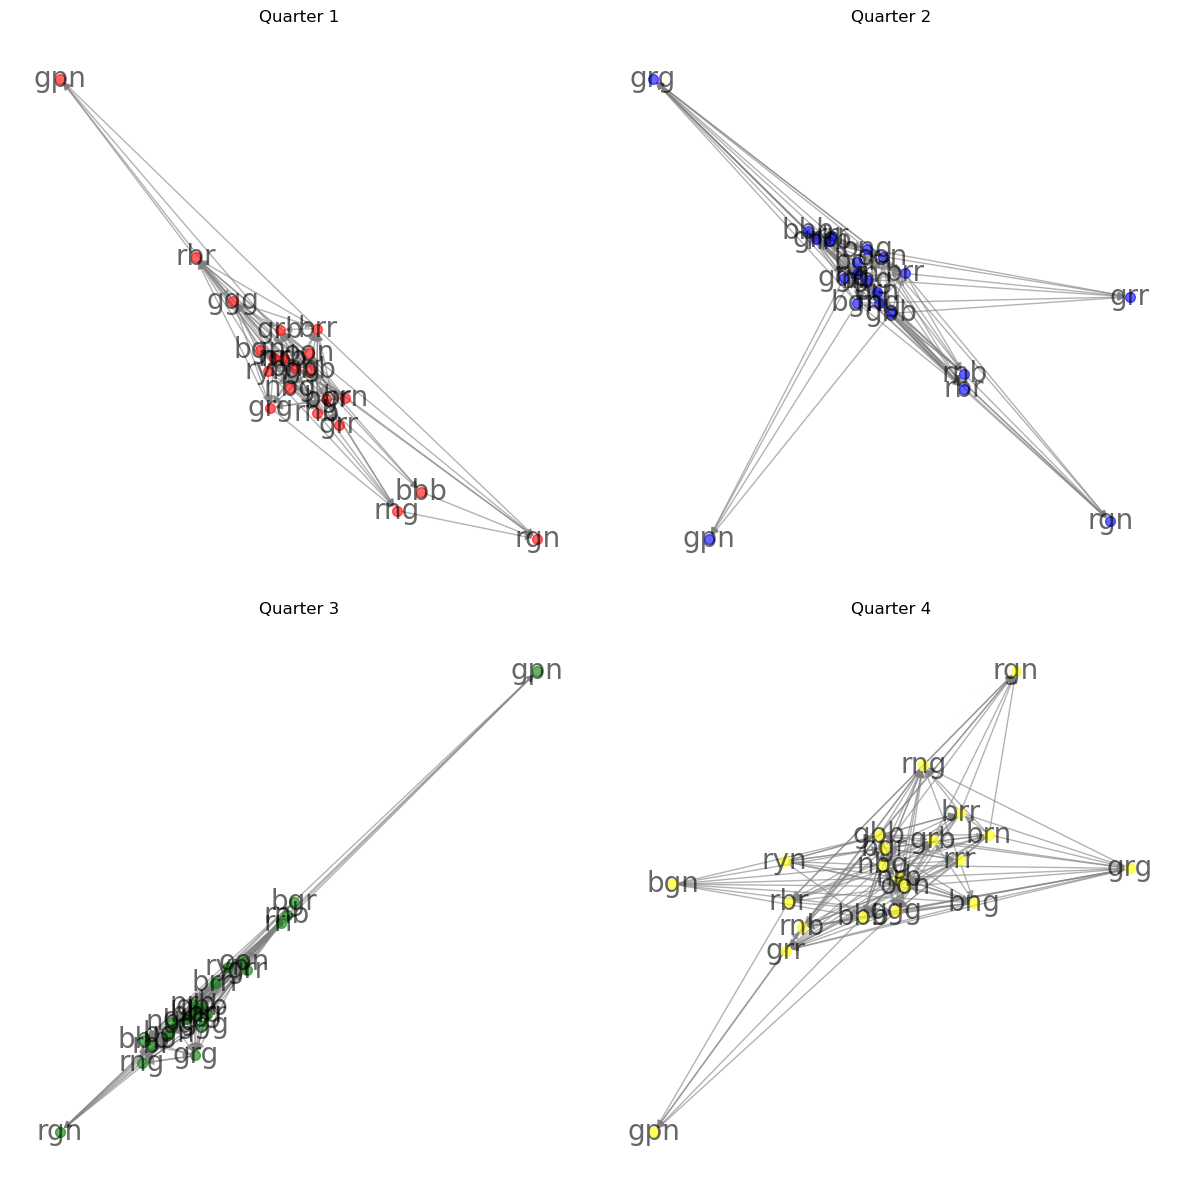

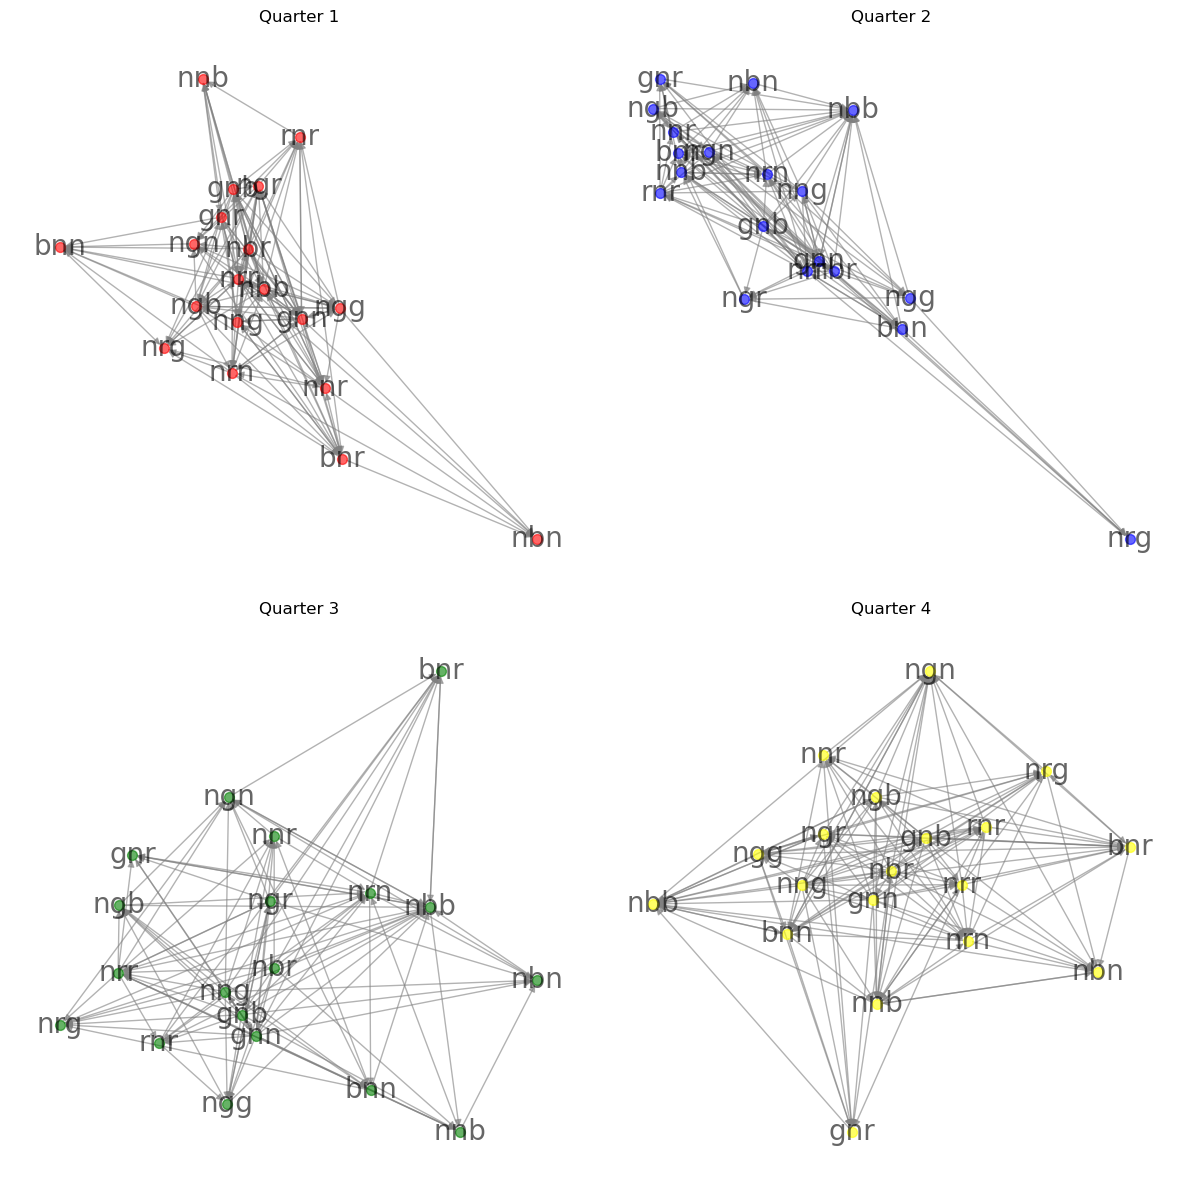

In [ ]:
#call the function!
plot_by_group(group1)
plot_by_group(group2)

In [ ]:
#plot rank swirl diagrams separated by group
quarter_names = sorted(df_dict.keys())
group1 = [name for name in quarter_names if name.endswith("G1")]
group2 = [name for name in quarter_names if name.endswith("G2")]
def rank_swirl_by_group(names): 
    fig, ax = plt.subplots(2,2, figsize = (12,12))
    for i, name in enumerate(names):
        row = i // 2
        col = i % 2
        axis = ax[row][col]
        svg_path = f"_swirl_{name}.svg"
        rank_swirl.nx2rankfigure(S_dict[name], G_dict[name], filepath = svg_path)

        png_bytes = cairosvg.svg2png(url=svg_path)
        img = Image.open(io.BytesIO(png_bytes))
        if name.startswith("Q1"):
            k = 0
        elif name.startswith("Q2"):
            k = 1
        elif name.startswith("Q3"):
            k = 2
        elif name.startswith("Q4"):
            k = 3
        axis.set_title(f"Quarter {k+1}")
        axis.imshow(img)
        axis.axis('off')
        #plt.close(swirl_fig)
    plt.tight_layout()
    plt.show()

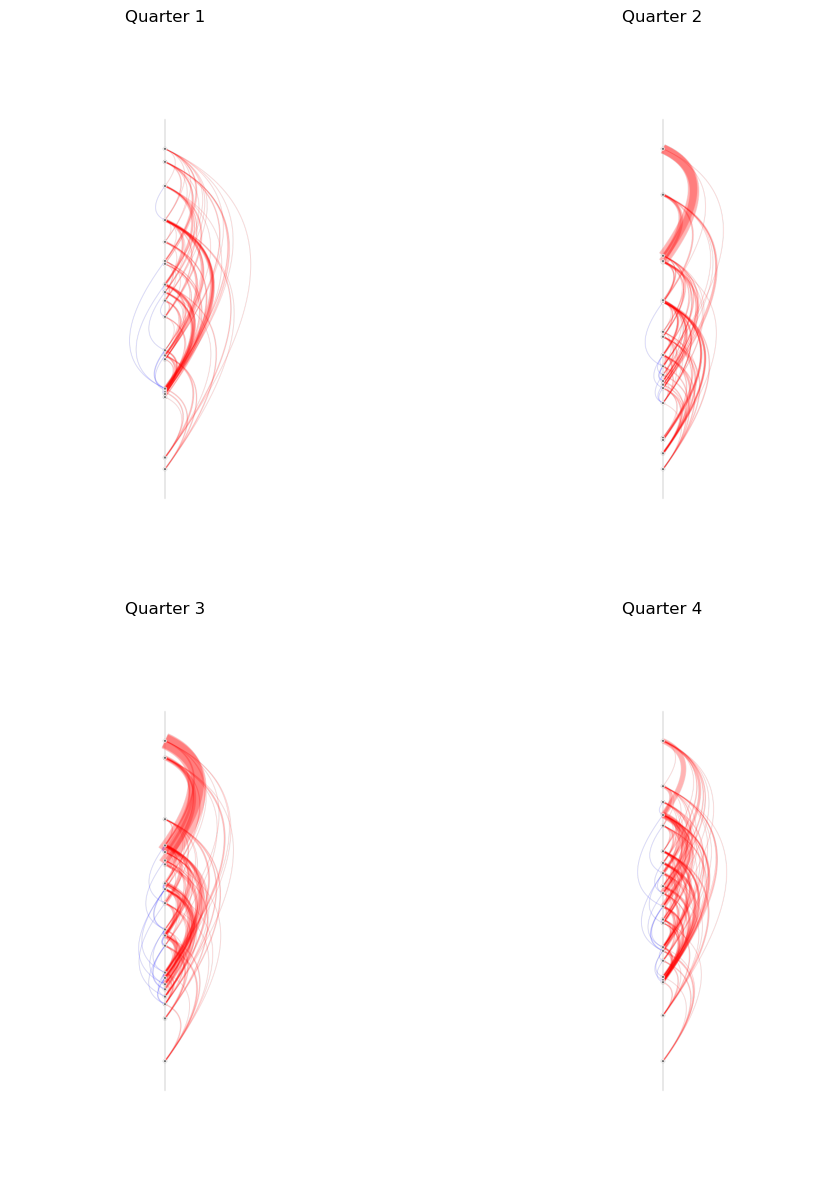

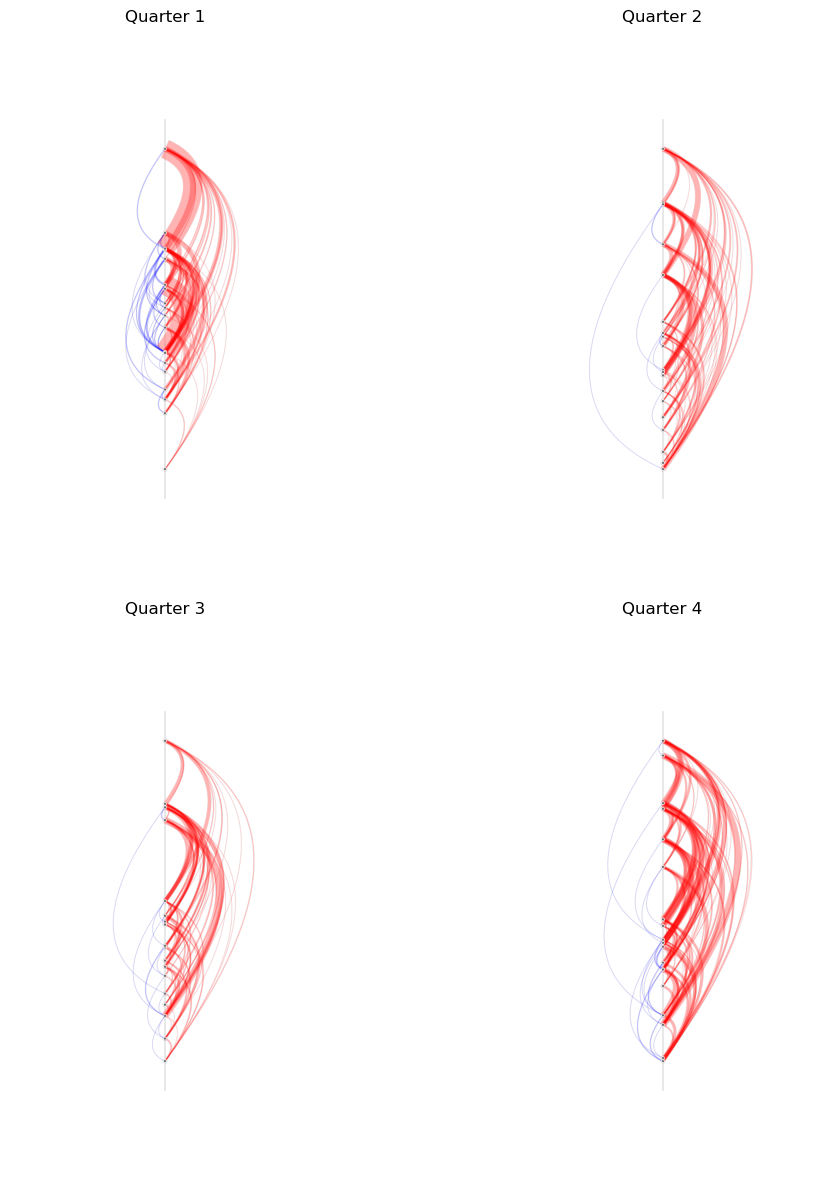

In [ ]:
#call the function!
rank_swirl_by_group(group1)
rank_swirl_by_group(group2)

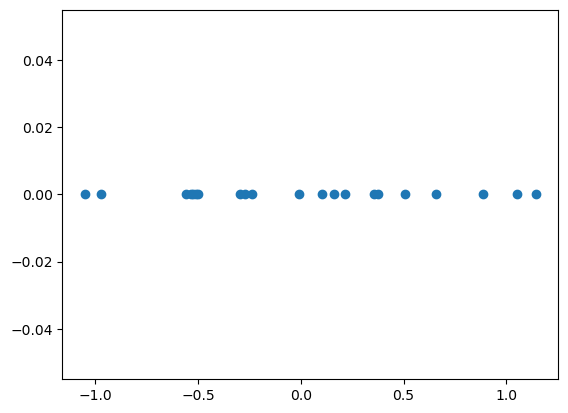

In [ ]:
#ordinal spring rankings (don't need this)
plt.plot(S, np.zeros(len(S)), "o")

In [ ]:
#not sure!
rank_swirl.nx2rankfigures(S, G)

AttributeError: 'str' object has no attribute 'nodes'